

> # CREDIT CARD FRAUD DETECTION


In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


In [3]:
#Importing the dependencies
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the data
data = pd.read_csv('/content/drive/MyDrive/data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Checking if there is any null values
data.isnull().values.any()

False

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x7eb5e8264bb0>,
 [Text(1.0999838009225849, 0.005969732649226358, 'Fraud'),
  Text(-1.0999838004750038, -0.005969815120018522, 'Normal')],
 [Text(0.5999911641395917, 0.003256217808668922, '0.2%'),
  Text(-0.5999911638954565, -0.003256262792737375, '99.8%')])

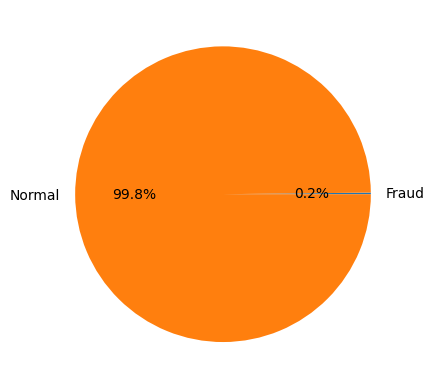

In [9]:
#Checking the proportion of normal and fraud cases
import matplotlib.pyplot as plt

labels = 'Fraud','Normal'
sizes = [ 492,284315]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

The target class in this dataset is highly skewed. Only 0.2% of the transactions are fraud, which means we can achieve 99.8% accuracy by simply predicting that every transaction is normal.

However, this accuracy is misleading, because it ignores the fraud transactions that we want to detect. Therefore,we need to sample the data and use other metrics as well which can capture the performance of our model on both classes.

Some of these metrics are: Precision, Recall, F1-score, ROC Curves and AUC!


In [10]:
# Get the Fraud and the normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [12]:
# We need to analyze information from the transaction data eg. what's the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


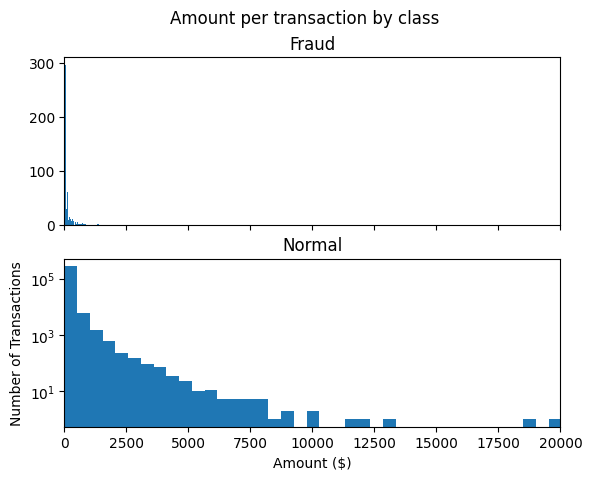

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

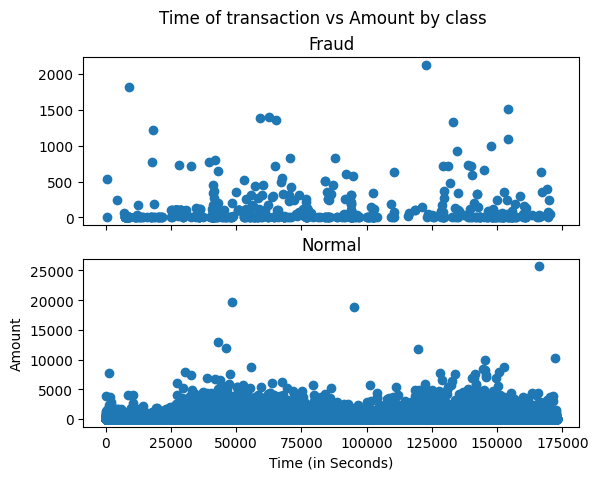

In [16]:
# We Will check if fraudulent transactions occur more often during certain timeframe?
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Taking a sample of the normal transactions,so as to balance the classes

In [17]:
normal_sample=normal.sample(n=492)

In [18]:
#row-wise concat
new_df=pd.concat([normal_sample,fraud],axis=0)

In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94291.554878,-0.054128,-0.064744,-0.046415,0.066753,-0.003048,-0.047023,-0.013352,0.072919,0.030974,...,0.002453,-0.016883,-0.013309,-0.008412,0.027901,0.013244,0.007023,-0.010722,0.002332,93.469695
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
num_cols = [col for col in new_df.columns if new_df[col].dtype != 'object']

In [21]:
X = new_df.drop('Class',axis=1)
Y = new_df['Class']

In [22]:
# Splitting the data into testing and training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#Model Training- Logistic Regression

In [23]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
print('Training Accuracy',lr.score(X_train,Y_train))
print('Testing Accuracy',lr.score(X_test,Y_test))

Training Accuracy 0.9440914866581956
Testing Accuracy 0.9086294416243654


In [61]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Accuracy score :  0.9086294416243654
Model Precision: 0.92
Model Recall: 0.9
Model F1-Score: 0.91
Model ROC: 0.91 

              precision    recall  f1-score   support

      Normal       0.90      0.92      0.91        95
       Fraud       0.92      0.90      0.91       102

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197
 



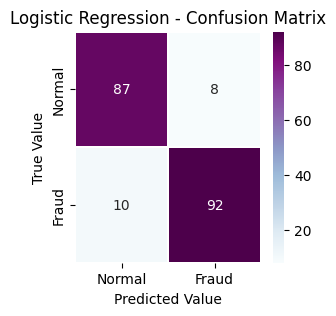

In [62]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions

Permutation explainer: 198it [00:32,  5.69it/s]
Permutation explainer: 985it [00:33, 25.01it/s]                         


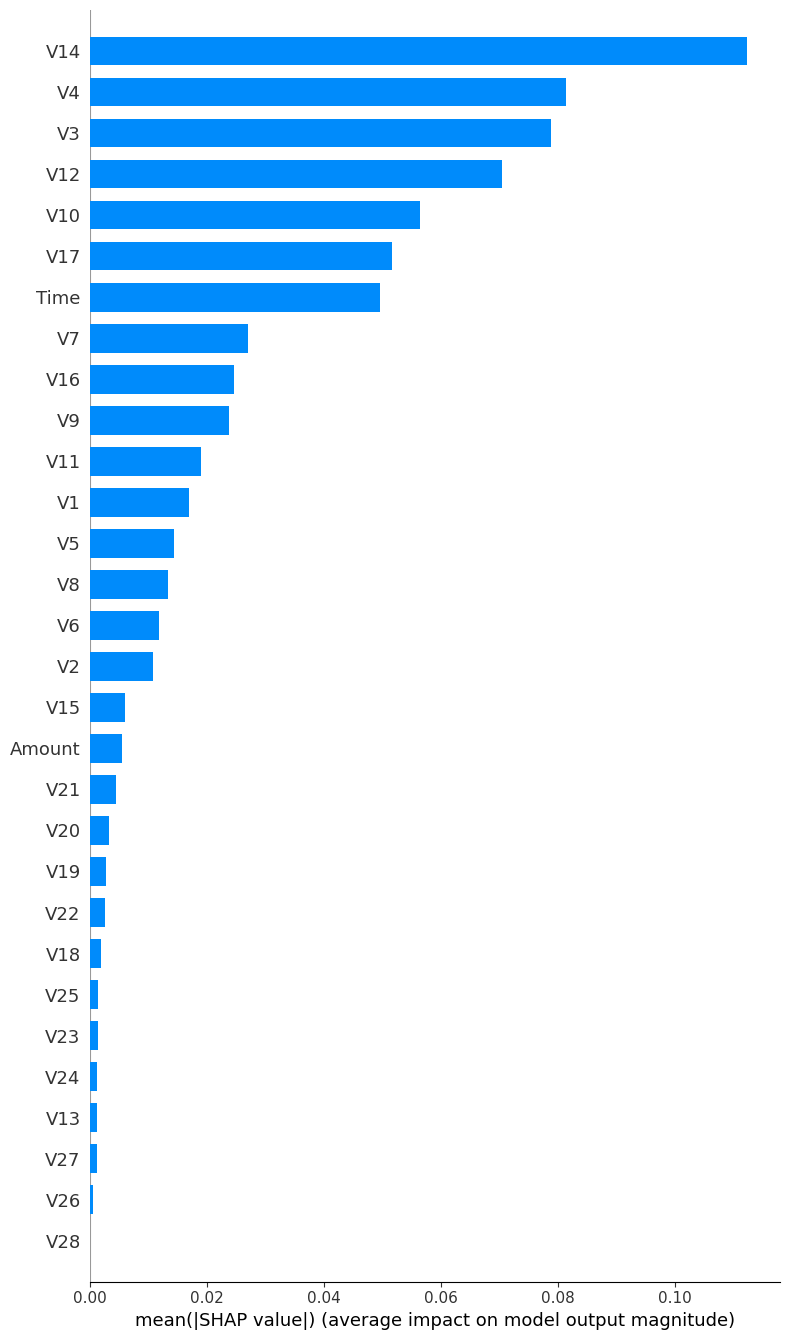

In [26]:
# Fits the explainer
explainer = shap.Explainer(lr.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

In [27]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LOGISTIC REGRESSION MODEL
cv = ShuffleSplit(n_splits=5,test_size=0.1)
score=cross_val_score(LogisticRegression(),X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.93939394 0.91919192 0.96969697 0.94949495 0.8989899 ]
0.9353535353535353


# Model Training- Random Forest Classifier

In [28]:
rf=RandomForestClassifier(n_estimators=20)
rf.fit(X_train,Y_train)
print('Training Accuracy',rf.score(X_train,Y_train))
print('Testing Accuracy',rf.score(X_test,Y_test))
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 0.9974587039390089
Testing Accuracy 0.9187817258883249


In [29]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR RANDOM FOREST CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=5, test_size=0.1)
score=cross_val_score(rf,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.90909091 0.92929293 0.94949495 0.93939394 0.92929293]
0.9313131313131313


Accuracy score :  0.9187817258883249
Model Precision: 0.94
Model Recall: 0.9
Model F1-Score: 0.92
Model ROC: 0.92 

              precision    recall  f1-score   support

      Normal       0.90      0.94      0.92        95
       Fraud       0.94      0.90      0.92       102

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197
 



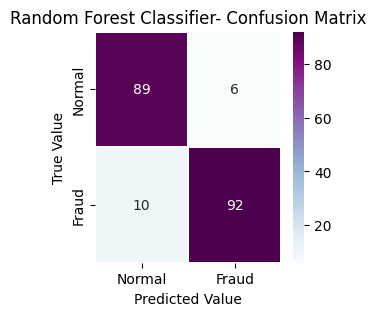

In [30]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier- Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# Model Training- Decision Tree Classifier

In [31]:
clf=DecisionTreeClassifier()

In [65]:
clf.fit(X_train,Y_train)
print('Training Accuracy',clf.score(X_train,Y_train))
print('Testing Accuracy',clf.score(X_test,Y_test))
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 1.0
Testing Accuracy 0.9035532994923858


In [33]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR DECISION TREE CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=5, test_size=0.1)
score=cross_val_score(clf,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.94949495 0.88888889 0.91919192 0.8989899  0.92929293]
0.9171717171717171


Accuracy score :  0.8883248730964467
Model Precision: 0.86
Model Recall: 0.93
Model F1-Score: 0.9
Model ROC: 0.89 

              precision    recall  f1-score   support

      Normal       0.92      0.84      0.88        95
       Fraud       0.86      0.93      0.90       102

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197
 



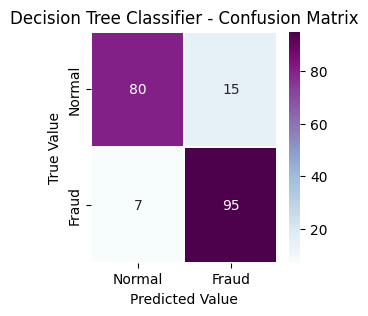

In [34]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Decision Tree Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions

Permutation explainer: 985it [00:17, 25.07it/s]                         


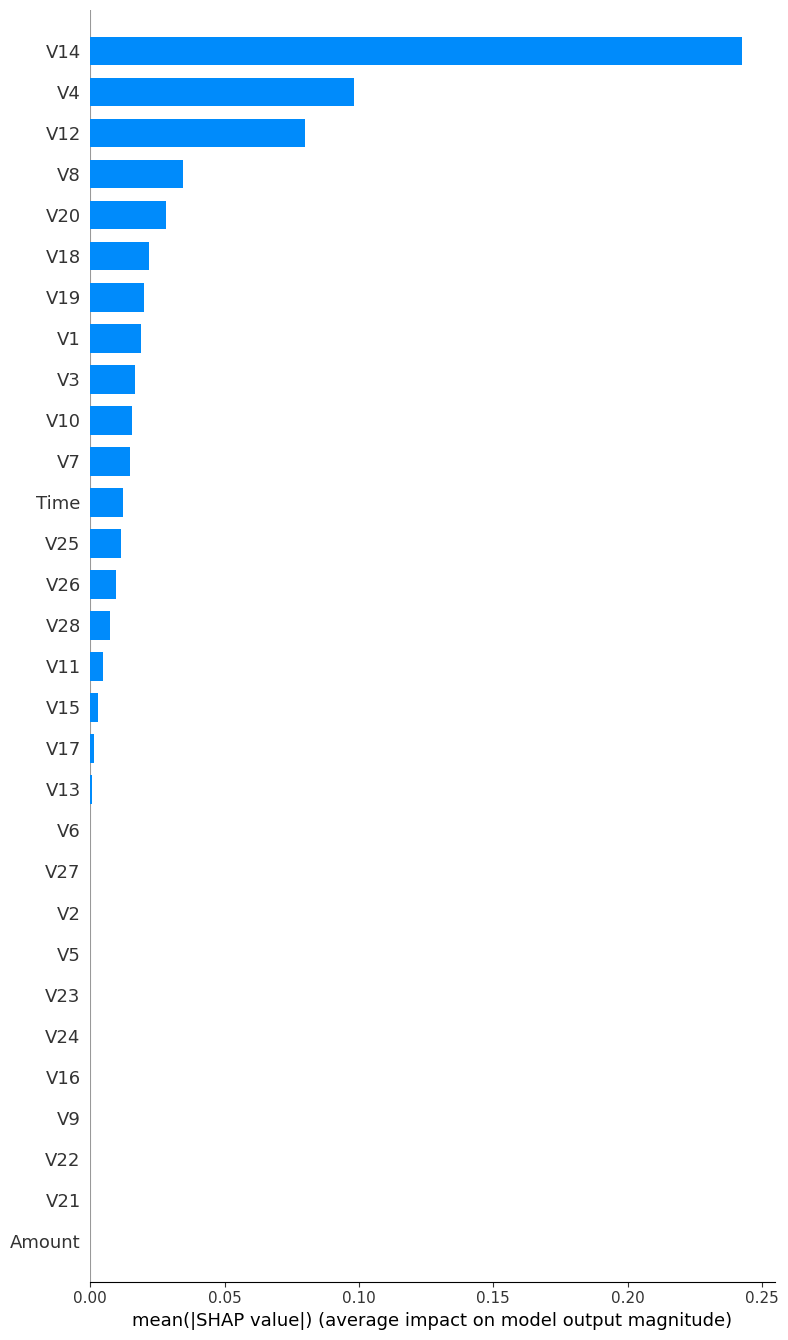

In [35]:
clf.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(clf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

# Model Training- Cat Boost Classifier

In [36]:
cbc=CatBoostClassifier()
cbc.fit(X_train,Y_train,eval_set=(X_test,Y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.029869
0:	learn: 0.6530966	test: 0.6546501	best: 0.6546501 (0)	total: 57.6ms	remaining: 57.6s
1:	learn: 0.6149800	test: 0.6203553	best: 0.6203553 (1)	total: 65.6ms	remaining: 32.7s
2:	learn: 0.5788907	test: 0.5830361	best: 0.5830361 (2)	total: 73.5ms	remaining: 24.4s
3:	learn: 0.5493024	test: 0.5545824	best: 0.5545824 (3)	total: 81.3ms	remaining: 20.3s
4:	learn: 0.5125422	test: 0.5171049	best: 0.5171049 (4)	total: 89.6ms	remaining: 17.8s
5:	learn: 0.4880390	test: 0.4925535	best: 0.4925535 (5)	total: 97.6ms	remaining: 16.2s
6:	learn: 0.4659087	test: 0.4720234	best: 0.4720234 (6)	total: 106ms	remaining: 15.1s
7:	learn: 0.4390183	test: 0.4458739	best: 0.4458739 (7)	total: 114ms	remaining: 14.1s
8:	learn: 0.4186135	test: 0.4267269	best: 0.4267269 (8)	total: 122ms	remaining: 13.4s
9:	learn: 0.3955669	test: 0.4056364	best: 0.4056364 (9)	total: 132ms	remaining: 13.1s
10:	learn: 0.3731012	test: 0.3856692	best: 0.3856692 (10)	total: 140ms	remaining: 12.6s
11:	learn: 0.357

In [37]:
y_pred = cbc.predict(X_test)
accuracy = (y_pred == np.array(Y_test)).mean()
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.934010152284264


Accuracy score :  0.934010152284264
Model Precision: 0.95
Model Recall: 0.92
Model F1-Score: 0.94
Model ROC: 0.93 

              precision    recall  f1-score   support

      Normal       0.92      0.95      0.93        95
       Fraud       0.95      0.92      0.94       102

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 



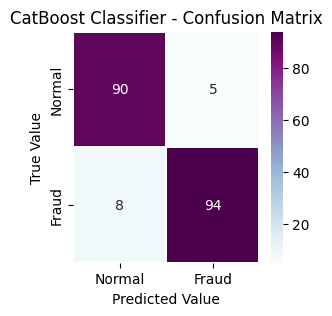

In [38]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("CatBoost Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions

Permutation explainer: 198it [00:20,  5.30it/s]
Permutation explainer: 985it [01:03, 13.51it/s]                         


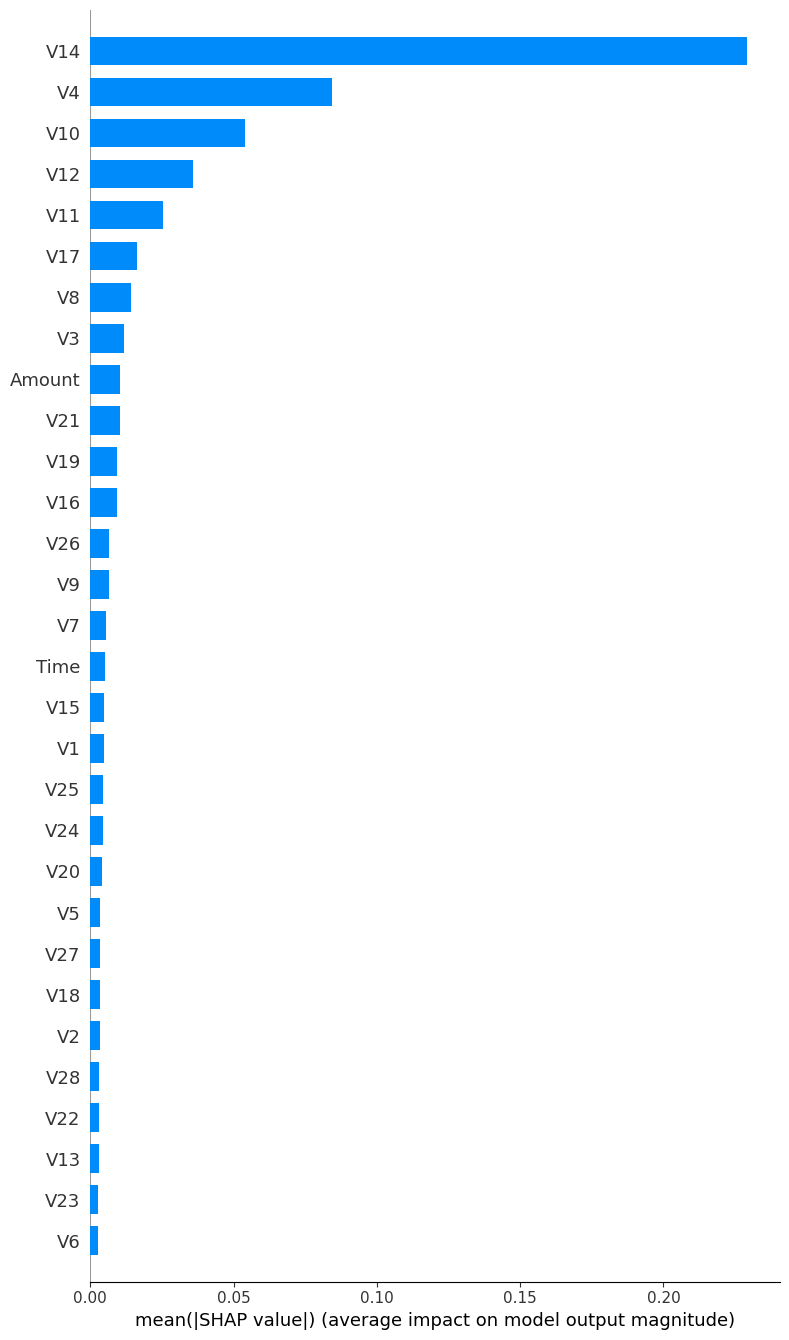

In [39]:
# Fits the explainer
explainer = shap.Explainer(cbc.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

# Model Training- Gradient Boosting Classifier

In [40]:
gbc=GradientBoostingClassifier()

In [41]:
gbc.fit(X_train,Y_train)
print('Training Accuracy',gbc.score(X_train,Y_train))
print('Testing Accuracy',gbc.score(X_test,Y_test))
y_pred =gbc.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 1.0
Testing Accuracy 0.9289340101522843


In [42]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR GRADIENT BOOSTING CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=4,test_size=0.1)
score=cross_val_score(gbc,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.93939394 0.91919192 0.91919192 0.91919192]
0.9242424242424242


Accuracy score :  0.9289340101522843
Model Precision: 0.92
Model Recall: 0.94
Model F1-Score: 0.93
Model ROC: 0.93 

              precision    recall  f1-score   support

      Normal       0.94      0.92      0.93        95
       Fraud       0.92      0.94      0.93       102

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 



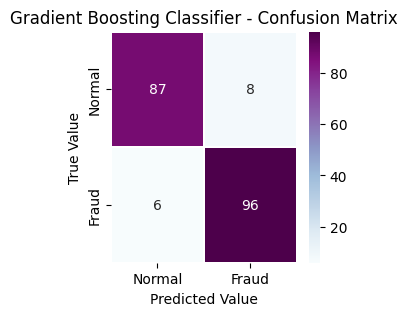

In [43]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions


Permutation explainer: 198it [00:19,  5.08it/s]
Permutation explainer: 985it [00:51, 15.20it/s]


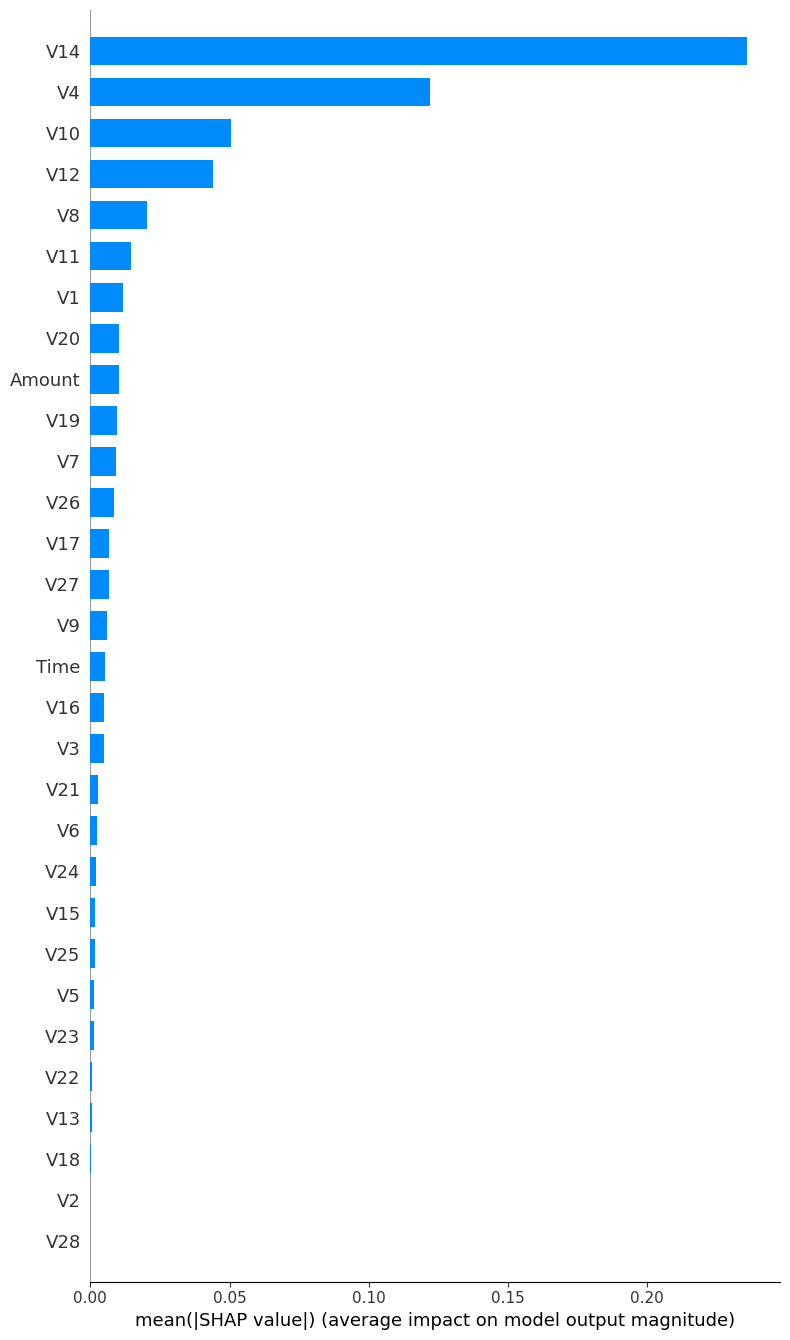

In [44]:
gbc.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(gbc.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

# Model Training- AdaBoost Classifier

In [45]:
adb=AdaBoostClassifier()

In [46]:
adb.fit(X_train,Y_train)
print('Training Accuracy',adb.score(X_train,Y_train))
print('Testing Accuracy',adb.score(X_test,Y_test))
y_pred =adb.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 0.9949174078780177
Testing Accuracy 0.934010152284264


In [47]:
# USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR ADABOOST CLASSIFIER MODEL
cv = ShuffleSplit(n_splits=5,test_size=0.1)
score=cross_val_score(adb,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.94949495 0.94949495 0.93939394 0.96969697 0.8989899 ]
0.9414141414141414


Accuracy score :  0.934010152284264
Model Precision: 0.95
Model Recall: 0.92
Model F1-Score: 0.94
Model ROC: 0.93 

              precision    recall  f1-score   support

      Normal       0.92      0.95      0.93        95
       Fraud       0.95      0.92      0.94       102

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 



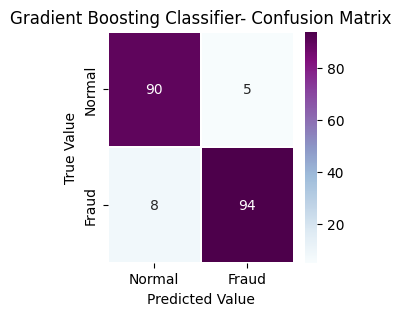

In [48]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Gradient Boosting Classifier- Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions


Permutation explainer: 198it [01:49,  1.65it/s]
Permutation explainer: 985it [04:55,  3.21it/s]


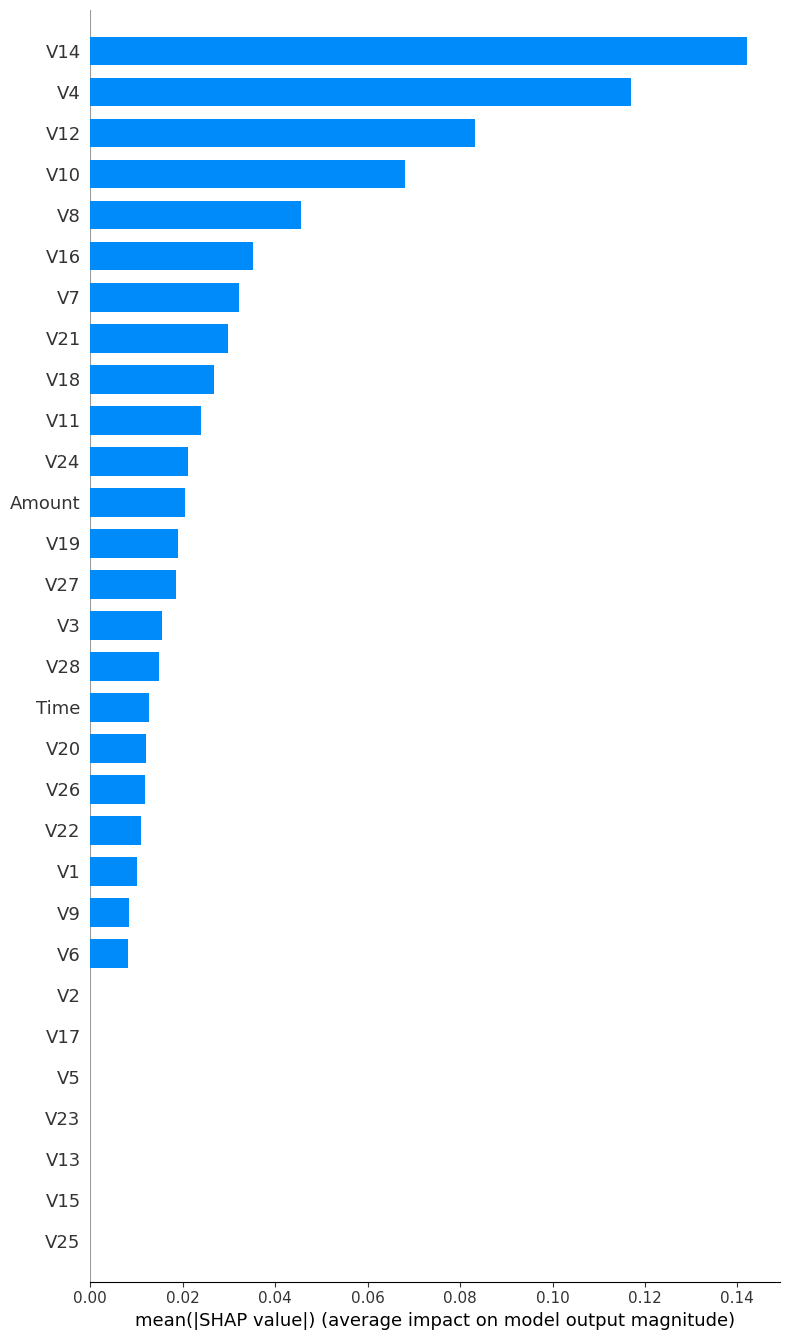

In [49]:
adb.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(adb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

#Model Training- XGB Classifier

In [50]:
xgb=XGBClassifier()
cv = ShuffleSplit(n_splits=5,test_size=0.1)
score=cross_val_score(xgb,X,Y,cv=cv)
print(score)
print(np.mean(score))

[0.92929293 0.96969697 0.92929293 0.97979798 0.97979798]
0.9575757575757576


In [51]:
xgb.fit(X_train,Y_train)
print('Training Accuracy',xgb.score(X_train,Y_train))
print('Testing Accuracy',xgb.score(X_test,Y_test))
y_pred =xgb.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Training Accuracy 1.0
Testing Accuracy 0.9289340101522843


Accuracy score :  0.9289340101522843
Model Precision: 0.94
Model Recall: 0.92
Model F1-Score: 0.93
Model ROC: 0.93 

              precision    recall  f1-score   support

      Normal       0.92      0.94      0.93        95
       Fraud       0.94      0.92      0.93       102

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197
 



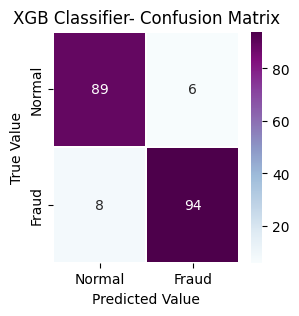

In [52]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Normal', 'Fraud']
plt.figure(figsize=(3,3))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("XGB Classifier- Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Use shap explainer to compute and visualize the feature contributions for the model predictions


Permutation explainer: 198it [00:22,  4.62it/s]
Permutation explainer: 985it [01:08, 12.31it/s]


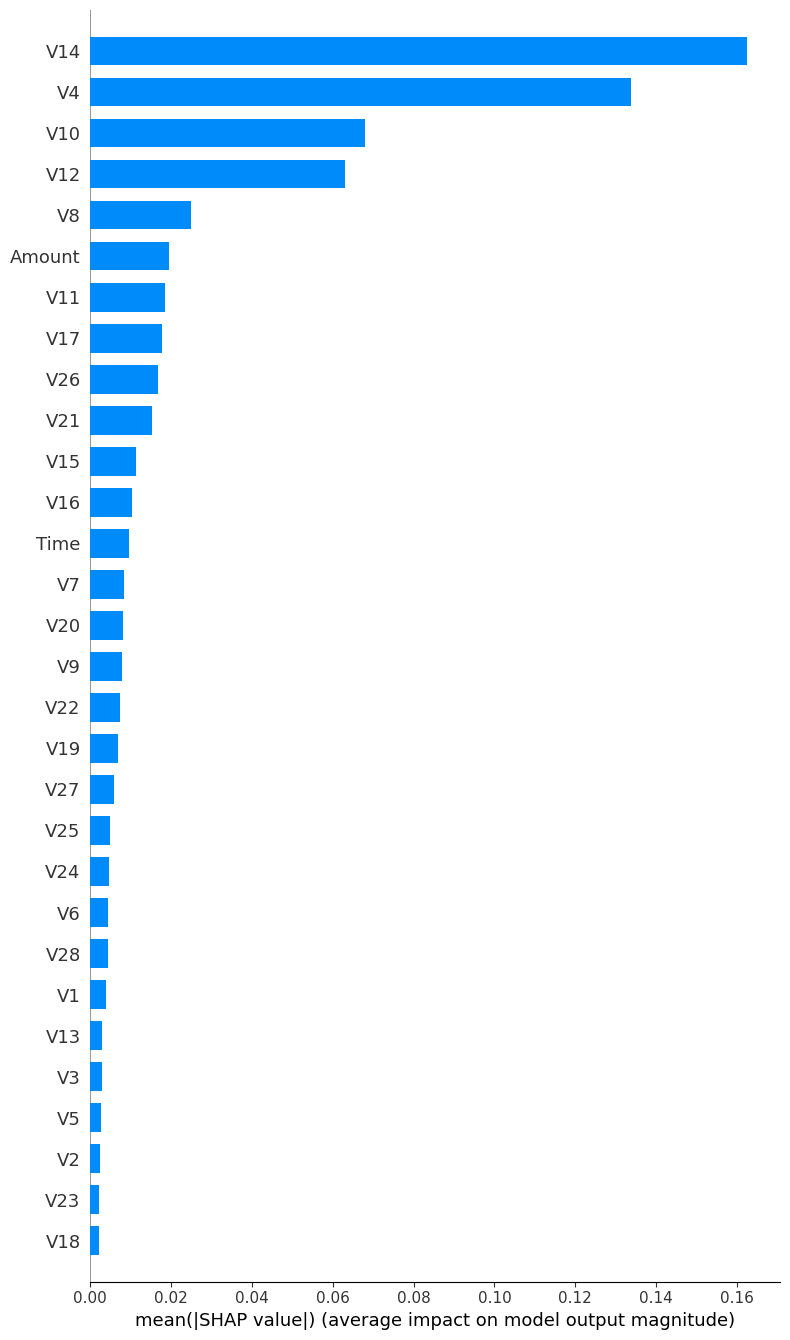

In [53]:
xgb.fit(X_train,Y_train)
# Fits the explainer
explainer = shap.Explainer(xgb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
# Evaluate SHAP values
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values,feature_names=num_cols,plot_type="bar",max_display=30)

Creating a dataframe to store accuracy,precision,recall of different models(which can be used for further visualisation)

In [56]:
# Create a dictionary to store the models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=20),
    'CatBoostClassifier':CatBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()

}

# Create a list to store the results
results = []

# Loop through the models and fit them on the training data
for name, model in models.items():
   model.fit(X_train, Y_train)
   # Predict on the testing data and calculate the accuracy, precision and recall scores
   Y_pred_train = model.predict(X_train)
   Y_pred_test = model.predict(X_test)
   train_acc = accuracy_score(Y_train, Y_pred_train)
   test_acc = accuracy_score(Y_test, Y_pred_test)
   train_prec = precision_score(Y_train, Y_pred_train)
   test_prec = precision_score(Y_test, Y_pred_test)
   train_rec = recall_score(Y_train, Y_pred_train)
   test_rec = recall_score(Y_test, Y_pred_test)
   # Append the results to the list as a dictionary
   results.append({'Model': name,'Training Accuracy': train_acc,'Testing Accuracy':test_acc,
                   'Training Precision': train_prec,'Testing Precision': test_prec,
                    'Training Recall': train_rec,'Testing Recall': test_rec })

# Create a new dataframe from the results list
df_results = pd.DataFrame(results)

# Save the dataframe as a csv file
df_results.to_csv('results.csv', index=False)

# Print the dataframe
print(df_results)

Learning rate set to 0.009301
0:	learn: 0.6804341	total: 18.8ms	remaining: 18.8s
1:	learn: 0.6676146	total: 35.2ms	remaining: 17.6s
2:	learn: 0.6547326	total: 57.4ms	remaining: 19.1s
3:	learn: 0.6434427	total: 74.9ms	remaining: 18.7s
4:	learn: 0.6288276	total: 95ms	remaining: 18.9s
5:	learn: 0.6180497	total: 113ms	remaining: 18.8s
6:	learn: 0.6077332	total: 133ms	remaining: 18.9s
7:	learn: 0.5948181	total: 152ms	remaining: 18.9s
8:	learn: 0.5851265	total: 171ms	remaining: 18.9s
9:	learn: 0.5727668	total: 199ms	remaining: 19.7s
10:	learn: 0.5609125	total: 219ms	remaining: 19.7s
11:	learn: 0.5516274	total: 237ms	remaining: 19.5s
12:	learn: 0.5421091	total: 255ms	remaining: 19.3s
13:	learn: 0.5321455	total: 267ms	remaining: 18.8s
14:	learn: 0.5232246	total: 280ms	remaining: 18.4s
15:	learn: 0.5131197	total: 298ms	remaining: 18.4s
16:	learn: 0.5031331	total: 313ms	remaining: 18.1s
17:	learn: 0.4944829	total: 322ms	remaining: 17.5s
18:	learn: 0.4866807	total: 330ms	remaining: 17s
19:	learn:

Creating a dataframe to store cross-validation accuracy of different models(which can be used for further visualisation/comparisions)

In [55]:
# Create a dictionary to store the models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=20),
    'CatBoostClassifier':CatBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()

}

# Create a list to store the results
results1 = []

# Loop through the models and fit them on the training data
for name, model in models.items():
    cv = ShuffleSplit(n_splits=5,test_size=0.1)
    score=cross_val_score(model,X,Y,cv=cv)
    acc=np.mean(score)
    # Append the results to the list as a dictionary
    results1.append({
        'Model': name,
        'Accuracy': acc
    })

# Create a new dataframe from the results list
df_results1 = pd.DataFrame(results1)

# Save the dataframe as a csv file
df_results1.to_csv('results1.csv', index=False)

# Print the dataframe
print(df_results1)

Streaming output truncated to the last 5000 lines.
12:	learn: 0.5374655	total: 134ms	remaining: 10.2s
13:	learn: 0.5271908	total: 142ms	remaining: 10s
14:	learn: 0.5162113	total: 151ms	remaining: 9.91s
15:	learn: 0.5057394	total: 159ms	remaining: 9.79s
16:	learn: 0.4957064	total: 167ms	remaining: 9.68s
17:	learn: 0.4869722	total: 176ms	remaining: 9.59s
18:	learn: 0.4794347	total: 184ms	remaining: 9.48s
19:	learn: 0.4723150	total: 192ms	remaining: 9.39s
20:	learn: 0.4627321	total: 204ms	remaining: 9.49s
21:	learn: 0.4548332	total: 212ms	remaining: 9.44s
22:	learn: 0.4472608	total: 228ms	remaining: 9.68s
23:	learn: 0.4389162	total: 236ms	remaining: 9.61s
24:	learn: 0.4306690	total: 246ms	remaining: 9.6s
25:	learn: 0.4238787	total: 255ms	remaining: 9.53s
26:	learn: 0.4170757	total: 263ms	remaining: 9.47s
27:	learn: 0.4106185	total: 272ms	remaining: 9.43s
28:	learn: 0.4032270	total: 281ms	remaining: 9.4s
29:	learn: 0.3969245	total: 290ms	remaining: 9.38s
30:	learn: 0.3916501	total: 299ms	r